In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url1 = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='
key = 'c1N7z7KEDvTRSI1eJtuHGiVHaOOlF7yuSjsMNvcd5CsskIzYTNbPuki3ImWbHToiVxBnGacopQcmmZrOjpohPg%3D%3D'
url2 = '&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20200410'
print(url1 + key + url2)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=c1N7z7KEDvTRSI1eJtuHGiVHaOOlF7yuSjsMNvcd5CsskIzYTNbPuki3ImWbHToiVxBnGacopQcmmZrOjpohPg%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200410&endCreateDt=20200410


In [3]:
# requests 라이브러리의 get 함수를 이용해 url경로에 응답 메시지 요청
url = url1+key+url2
xml = requests.get(url)
xml

<Response [200]>

In [4]:
# 디코딩하여 유니코드 변환
# 문자열 응답인 것을 알고 있을 경우, html요청을
# .text로 사용하면 바로 유니코드 반환

xml.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><createDt>2020-04-10 11:17:35.35</createDt><deathCnt>0</deathCnt><defCnt>352</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>4</incDec><isolClearCnt>3</isolClearCnt><isolIngCnt>349</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>4</overFlowCnt><qurRate>-</qurRate><seq>1014</seq><stdDay>2020년 04월 10일 00시</stdDay><updateDt>NULL</updateDt></item><item><createDt>2020-04-10 11:17:35.35</createDt><deathCnt>0</deathCnt><defCnt>12</defCnt><gubun>제주</gubun><gubunCn>济州</gubunCn><gubunEn>Jeju</gubunEn><incDec>0</incDec><isolClearCnt>4</isolClearCnt><isolIngCnt>8</isolIngCnt><localOccCnt>0</localOccCnt><overFlowCnt>0</overFlowCnt><qurRate>1.79</qurRate><seq>1013</seq><stdDay>2020년 04월 10일 00시</stdDay><updateDt>NULL</updateDt></item><item><createDt>2020-04-10 11:17:35.35</createDt><deathCnt>0</d

In [5]:
#  BeautifulSoup 생성자에서 xml.text를 파싱하고
# 그 결과를 BeautifulSoup 객체로 반환한다.

soup =  BeautifulSoup(xml.text, 'html.parser')
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</deathcnt><defcnt>352</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>4</incdec><isolclearcnt>3</isolclearcnt><isolingcnt>349</isolingcnt><localocccnt>0</localocccnt><overflowcnt>4</overflowcnt><qurrate>-</qurrate><seq>1014</seq><stdday>2020년 04월 10일 00시</stdday><updatedt>NULL</updatedt></item><item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</deathcnt><defcnt>12</defcnt><gubun>제주</gubun><gubuncn>济州</gubuncn><gubunen>Jeju</gubunen><incdec>0</incdec><isolclearcnt>4</isolclearcnt><isolingcnt>8</isolingcnt><localocccnt>0</localocccnt><overflowcnt>0</overflowcnt><qurrate>1.79</qurrate><seq>1013</seq><stdday>2020년 04월 10일 00시</stdday><updatedt>NULL</updatedt></item><item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</de

In [6]:
soup.find('item')

<item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</deathcnt><defcnt>352</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>4</incdec><isolclearcnt>3</isolclearcnt><isolingcnt>349</isolingcnt><localocccnt>0</localocccnt><overflowcnt>4</overflowcnt><qurrate>-</qurrate><seq>1014</seq><stdday>2020년 04월 10일 00시</stdday><updatedt>NULL</updatedt></item>

In [7]:
soup.find('item').find('gubun')

<gubun>검역</gubun>

In [8]:
# find_all함수는 'item'태그를 모두 찾아 리스트 형태로 반환

soup.find_all('item')[0]

<item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</deathcnt><defcnt>352</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>4</incdec><isolclearcnt>3</isolclearcnt><isolingcnt>349</isolingcnt><localocccnt>0</localocccnt><overflowcnt>4</overflowcnt><qurrate>-</qurrate><seq>1014</seq><stdday>2020년 04월 10일 00시</stdday><updatedt>NULL</updatedt></item>

In [28]:
# 리스트에서 0번째 위치 인덱싱
soup.find_all('item')[0]

<item><createdt>2020-04-10 11:17:35.35</createdt><deathcnt>0</deathcnt><defcnt>352</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>4</incdec><isolclearcnt>3</isolclearcnt><isolingcnt>349</isolingcnt><localocccnt>0</localocccnt><overflowcnt>4</overflowcnt><qurrate>-</qurrate><seq>1014</seq><stdday>2020년 04월 10일 00시</stdday><updatedt>NULL</updatedt></item>

In [34]:
soup.find_all('item')[1].find('gubun')

<gubun>제주</gubun>

In [9]:
# 한 페이지 검색 결과 수를 38개로 지정
numOfRows = soup.find('totalcount')
# input 함수로 검색 시작 날짜와 종료 날짜 입력
startCreateDt = input('시작날짜를 입력하세요(예:yyyymmdd): ')
endCreateDt = input('시작날짜를 입력하세요(예:yyyymmdd): ')

시작날짜를 입력하세요(예:yyyymmdd): 20210504
시작날짜를 입력하세요(예:yyyymmdd): 20210504


In [10]:
# <totalcount>38</totalcount>는 문자열이 아님
numOfRows

<totalcount>38</totalcount>

In [11]:
# text함수를 이용하여 <totalcount>38</totalcount>에서
# 태그를 제외한 문자만 추출하여 문자열로 반환
numOfRows.text

'38'

In [12]:
# 한 페이지 검색 결과 수를 38개로 지정
numOfRows = soup.find('totalcount').text
# input 함수로 검색 시작 날짜와 종료 날짜 입력
startCreateDt = input('시작날짜를 입력하세요(예:yyyymmdd): ')
endCreateDt = input('시작날짜를 입력하세요(예:yyyymmdd): ')

시작날짜를 입력하세요(예:yyyymmdd): 20210504
시작날짜를 입력하세요(예:yyyymmdd): 20210504


In [13]:
numOfRows

'38'

In [14]:
startCreateDt

'20210504'

In [15]:
endCreateDt

'20210504'

In [16]:
# url2 수정
url1 = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='
key = 'c1N7z7KEDvTRSI1eJtuHGiVHaOOlF7yuSjsMNvcd5CsskIzYTNbPuki3ImWbHToiVxBnGacopQcmmZrOjpohPg%3D%3D'
url2 = '&pageNo=1&numOfRows='+numOfRows+'&startCreateDt='+startCreateDt+'&endCreateDt='+endCreateDt
url = url1 + key + url2
print(url)


http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=c1N7z7KEDvTRSI1eJtuHGiVHaOOlF7yuSjsMNvcd5CsskIzYTNbPuki3ImWbHToiVxBnGacopQcmmZrOjpohPg%3D%3D&pageNo=1&numOfRows=38&startCreateDt=20210504&endCreateDt=20210504


In [18]:
# 새로운 url에 요청을 다시 한다.
xml = requests.get(url)
soup = BeautifulSoup(xml.text, 'html.parser')
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>4</deathcnt><defcnt>3507</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>7</incdec><isolclearcnt>3271</isolclearcnt><isolingcnt>232</isolingcnt><localocccnt>0</localocccnt><overflowcnt>7</overflowcnt><qurrate>-</qurrate><seq>9298</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item><item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>1</deathcnt><defcnt>724</defcnt><gubun>제주</gubun><gubuncn>济州</gubuncn><gubunen>Jeju</gubunen><incdec>8</incdec><isolclearcnt>682</isolclearcnt><isolingcnt>41</isolingcnt><localocccnt>8</localocccnt><overflowcnt>0</overflowcnt><qurrate>107.94</qurrate><seq>9297</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item><item><createdt>2021-05-04 09:52:44.207</createdt><d

In [21]:
# item 태그 모두 찾기
data_lst = soup.find_all('item')

In [22]:
data_lst

[<item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>4</deathcnt><defcnt>3507</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>7</incdec><isolclearcnt>3271</isolclearcnt><isolingcnt>232</isolingcnt><localocccnt>0</localocccnt><overflowcnt>7</overflowcnt><qurrate>-</qurrate><seq>9298</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item>,
 <item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>1</deathcnt><defcnt>724</defcnt><gubun>제주</gubun><gubuncn>济州</gubuncn><gubunen>Jeju</gubunen><incdec>8</incdec><isolclearcnt>682</isolclearcnt><isolingcnt>41</isolingcnt><localocccnt>8</localocccnt><overflowcnt>0</overflowcnt><qurrate>107.94</qurrate><seq>9297</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item>,
 <item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>18</deathcnt><defcnt>4099</defcnt><gubun>경남</gubun><gubuncn>庆南</gubuncn><gubunen>Gyeongsangnam-do</gubunen><incdec>36</incdec><isolclearcnt>3593<

In [23]:
len(data_lst)

19

In [24]:
data_lst[0]

<item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>4</deathcnt><defcnt>3507</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>7</incdec><isolclearcnt>3271</isolclearcnt><isolingcnt>232</isolingcnt><localocccnt>0</localocccnt><overflowcnt>7</overflowcnt><qurrate>-</qurrate><seq>9298</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item>

In [25]:
test = data_lst[1].find('gubun')
test

<gubun>제주</gubun>

In [26]:
test = data_lst[1].find('gubun').text
test

'제주'

In [27]:
test_lst = []
for i in data_lst:
    DEF_CNT = i.find('defcnt').text
    
    test_lst.append(DEF_CNT)

In [59]:
test_lst

['3519',
 '737',
 '4126',
 '4244',
 '1101',
 '1988',
 '3105',
 '2671',
 '2772',
 '34953',
 '372',
 '2055',
 '1788',
 '2445',
 '5739',
 '9401',
 '5166',
 '38763',
 '124945']

In [28]:
data_lst[0]

<item><createdt>2021-05-04 09:52:44.207</createdt><deathcnt>4</deathcnt><defcnt>3507</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>7</incdec><isolclearcnt>3271</isolclearcnt><isolingcnt>232</isolingcnt><localocccnt>0</localocccnt><overflowcnt>7</overflowcnt><qurrate>-</qurrate><seq>9298</seq><stdday>2021년 05월 04일 00시</stdday><updatedt>null</updatedt></item>

In [29]:
con_lst = []
for i in data_lst:
    DEF_CNT = i.find('defcnt').text           # 확진자 수
    GUBUN = i.find('gubun').text              # 시도명(한글)
    INC_DEC = i.find('incdec').text           # 전일대비 증감수
    ISOL_ING_CNT = i.find('isolingcnt').text  # 격리 중 환자수
    LOCAL_OCC_CNT = i.find('localocccnt').text# 지역발생 수
    OVER_FLOW_CNT = i.find('overflowcnt').text# 해외유입 수
    STD_DAY = i.find('stdday').text           # 기준일시
    con_lst.append({'지역':GUBUN, '기준일':STD_DAY, '격리자수':ISOL_ING_CNT,
                      '확진자수':DEF_CNT, '전일대비증감':INC_DEC,
                      '지역감염':LOCAL_OCC_CNT, '해외유입':OVER_FLOW_CNT})
con_lst

[{'지역': '검역',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '232',
  '확진자수': '3507',
  '전일대비증감': '7',
  '지역감염': '0',
  '해외유입': '7'},
 {'지역': '제주',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '41',
  '확진자수': '724',
  '전일대비증감': '8',
  '지역감염': '8',
  '해외유입': '0'},
 {'지역': '경남',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '488',
  '확진자수': '4099',
  '전일대비증감': '36',
  '지역감염': '35',
  '해외유입': '1'},
 {'지역': '경북',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '309',
  '확진자수': '4206',
  '전일대비증감': '22',
  '지역감염': '18',
  '해외유입': '4'},
 {'지역': '전남',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '94',
  '확진자수': '1089',
  '전일대비증감': '9',
  '지역감염': '9',
  '해외유입': '0'},
 {'지역': '전북',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '131',
  '확진자수': '1982',
  '전일대비증감': '12',
  '지역감염': '12',
  '해외유입': '0'},
 {'지역': '충남',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '193',
  '확진자수': '3095',
  '전일대비증감': '19',
  '지역감염': '18',
  '해외유입': '1'},
 {'지역': '충북',
  '기준일': '2021년 05월 04일 00시',
  '격리자수': '159',
  '확진자수': '2660',
  '전일대비증감': '7',
  '지역감염': 

In [30]:
data_df = pd.DataFrame(con_lst)
data_df

,지역,기준일,격리자수,확진자수,전일대비증감,지역감염,해외유입
0,검역,2021년 05월 04일 00시,232,3507,7,0,7
1,제주,2021년 05월 04일 00시,41,724,8,8,0
2,경남,2021년 05월 04일 00시,488,4099,36,35,1
3,경북,2021년 05월 04일 00시,309,4206,22,18,4
4,전남,2021년 05월 04일 00시,94,1089,9,9,0
5,전북,2021년 05월 04일 00시,131,1982,12,12,0
6,충남,2021년 05월 04일 00시,193,3095,19,18,1
7,충북,2021년 05월 04일 00시,159,2660,7,5,2
8,강원,2021년 05월 04일 00시,145,2724,22,22,0
9,경기,2021년 05월 04일 00시,2443,34785,124,117,7


In [31]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 파일 경로 지시
fl = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family=fl)


data_df['전일대비증감'] = data_df['전일대비증감'].astype('int')
data_df.set_index('지역', inplace=True)

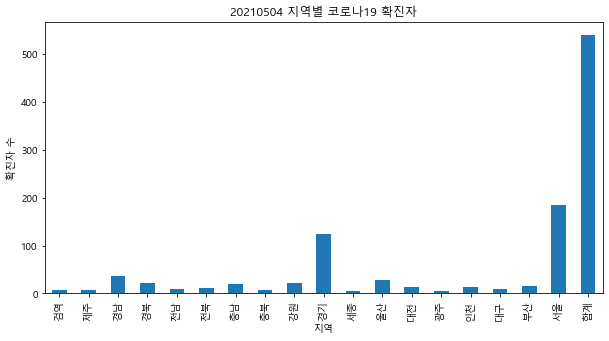

In [33]:
df_bar = data_df['전일대비증감'].plot(kind='bar', figsize=(10,5),
                                      title = '20210504 지역별 코로나19 확진자',
                                      ylabel = '확진자 수')